In [78]:
import datetime
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline 


In [67]:
today_date=datetime.now()
filename = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-"+today_date.strftime('%Y')+"-"+today_date.strftime('%m')+"-"+today_date.strftime('%d')+ ".xlsx"
#filename ="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-23.xlsx"
df=pd.read_excel(filename)

In [68]:
df_uk_1=df.loc[df["GeoId"]=='UK']

In [69]:
df_uk_C = df_uk_1.sort_values('DateRep')
df_uk_C['UK_Total_Cases'] = df_uk_C['Cases'].cumsum()

indexNames = df_uk_C[ df_uk_C['UK_Total_Cases'] == 0 ].index
df_uk_C.drop(indexNames, inplace=True)

df_uk_C = df_uk_C.reset_index(drop=True)

df_uk_C.tail()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,UK_Total_Cases
49,2020-03-20,20,3,2020,647,41,United_Kingdom,UK,3277
50,2020-03-21,21,3,2020,706,33,United_Kingdom,UK,3983
51,2020-03-22,22,3,2020,1035,56,United_Kingdom,UK,5018
52,2020-03-23,23,3,2020,665,48,United_Kingdom,UK,5683
53,2020-03-24,24,3,2020,967,54,United_Kingdom,UK,6650


In [70]:
df_uk_D = df_uk_1.sort_values('DateRep')
df_uk_D['UK_Total_Deaths'] = df_uk_D['Deaths'].cumsum()

indexNamesD = df_uk_D[ df_uk_D['UK_Total_Deaths'] == 0 ].index
df_uk_D.drop(indexNamesD, inplace=True)

df_uk_D = df_uk_D.reset_index(drop=True)

df_uk_D.tail()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,UK_Total_Deaths
14,2020-03-20,20,3,2020,647,41,United_Kingdom,UK,144
15,2020-03-21,21,3,2020,706,33,United_Kingdom,UK,177
16,2020-03-22,22,3,2020,1035,56,United_Kingdom,UK,233
17,2020-03-23,23,3,2020,665,48,United_Kingdom,UK,281
18,2020-03-24,24,3,2020,967,54,United_Kingdom,UK,335


In [53]:
df_it_1=df.loc[df["GeoId"]=='IT']

In [71]:
df_it_C = df_it_1.sort_values('DateRep')
df_it_C['IT_Total_Cases'] = df_it_C['Cases'].cumsum()

indexNamesIT = df_it_C[ df_it_C['IT_Total_Cases'] == 0 ].index
df_it_C.drop(indexNamesIT, inplace=True)

df_it_C = df_it_C.reset_index(drop=True)

df_it_C.tail()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,IT_Total_Cases
49,2020-03-20,20,3,2020,5322,429,Italy,IT,41035
50,2020-03-21,21,3,2020,5986,625,Italy,IT,47021
51,2020-03-22,22,3,2020,6557,795,Italy,IT,53578
52,2020-03-23,23,3,2020,5560,649,Italy,IT,59138
53,2020-03-24,24,3,2020,4789,601,Italy,IT,63927


In [72]:
df_it_D = df_it_1.sort_values('DateRep')
df_it_D['IT_Total_Deaths'] = df_it_D['Deaths'].cumsum()

indexNamesITD = df_it_D[ df_it_D['IT_Total_Deaths'] == 0 ].index
df_it_D.drop(indexNamesITD, inplace=True)

df_it_D = df_it_D.reset_index(drop=True)

df_it_D.tail()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,IT_Total_Deaths
26,2020-03-20,20,3,2020,5322,429,Italy,IT,3407
27,2020-03-21,21,3,2020,5986,625,Italy,IT,4032
28,2020-03-22,22,3,2020,6557,795,Italy,IT,4827
29,2020-03-23,23,3,2020,5560,649,Italy,IT,5476
30,2020-03-24,24,3,2020,4789,601,Italy,IT,6077


In [73]:
it_total_cases = df_it_C['IT_Total_Cases']

pd_case = df_uk_C.join(it_total_cases)


In [74]:
it_total_deaths = df_it_D['IT_Total_Deaths']

pd_death = df_uk_D.join(it_total_deaths)


In [75]:
uk_maxC = pd_case.max()
uk_maxD = pd_death.max()

In [84]:
print ("UK case percentage: ", uk_maxC['UK_Total_Cases']/uk_maxC['IT_Total_Cases'])
print ("UK death percentage: ", uk_maxD['UK_Total_Deaths']/uk_maxD['IT_Total_Deaths'])
print (uk_maxC)
print (uk_maxD)

UK case percentage:  0.10402490340544684
UK death percentage:  0.40507859733978235
DateRep                      2020-03-24 00:00:00
Day                                           31
Month                                          3
Year                                        2020
Cases                                       1035
Deaths                                        56
Countries and territories         United_Kingdom
GeoId                                         UK
UK_Total_Cases                              6650
IT_Total_Cases                             63927
dtype: object
DateRep                      2020-03-24 00:00:00
Day                                           24
Month                                          3
Year                                        2020
Cases                                       1035
Deaths                                        56
Countries and territories         United_Kingdom
GeoId                                         UK
UK_Total_Deaths      

In [83]:
datefortoday=datetime.date.today()
dateforyesterday=datefortoday-datetime.timedelta(days = 1)
print (dateforyesterday)

2020-03-23


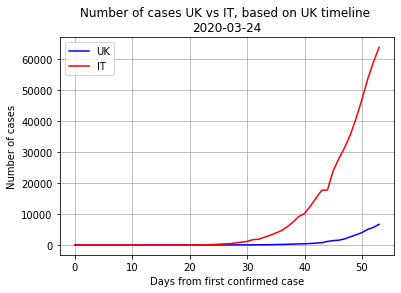

In [60]:
x_uk = df_uk_C.index
y_uk = df_uk_C['UK_Total_Cases']
x_it = df_it_C.index
y_it = df_it_C['IT_Total_Cases']

plt.title('Number of cases UK vs IT, based on UK timeline \n' +dateforyesterday)
plt.xlabel('Days from first confirmed case')
plt.ylabel('Number of cases')
plt.grid(True)

uk_plot= plt.plot(x_uk,y_uk, color='blue', label='UK')
it_plot= plt.plot(x_it,y_it, color='red', label='IT')
plt.legend()


plt.savefig("UKvsIT_UK_baseline" +dateforyesterday+ ".pdf")

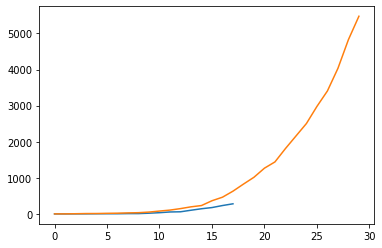

In [14]:
x_ukD = df_uk_D.index
y_ukD = df_uk_D['UK_Total_Deaths']
x_itD = df_it_D.index
y_itD = df_it_D['IT_Total_Deaths']

plt.plot(x_ukD,y_ukD)
plt.plot(x_itD,y_itD)

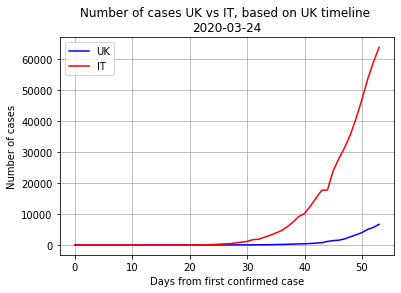

In [61]:
x = pd_case.index
y_uk = pd_case['UK_Total_Cases']
y_it = pd_case['IT_Total_Cases']

plt.title('Number of cases UK vs IT, based on UK timeline \n' +today_date.strftime('%Y')+"-"+today_date.strftime('%m')+"-"+today_date.strftime('%d'))
plt.xlabel('Days from first confirmed case')
plt.ylabel('Number of cases')
plt.grid(True)

uk_plotC= plt.plot(x_uk,y_uk, color='blue', label='UK')
it_plotC= plt.plot(x_it,y_it, color='red', label='IT')
plt.legend()


plt.savefig("UKvsIT_UK_baseline" +today_date.strftime('%Y')+"-"+today_date.strftime('%m')+"-"+today_date.strftime('%d')+ ".pdf")


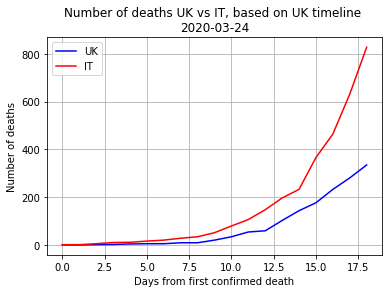

In [64]:
xd = pd_death.index
yd_uk = pd_death['UK_Total_Deaths']
yd_it = pd_death['IT_Total_Deaths']

plt.title('Number of deaths UK vs IT, based on UK timeline \n' +today_date.strftime('%Y')+"-"+today_date.strftime('%m')+"-"+today_date.strftime('%d'))
plt.xlabel('Days from first confirmed death')
plt.ylabel('Number of deaths')
plt.grid(True)

uk_plotD= plt.plot(xd,yd_uk, color='blue', label='UK')
it_plotD= plt.plot(xd,yd_it, color='red', label='IT')
plt.legend()


plt.savefig("UKvsIT_Death_UK_baseline" +today_date.strftime('%Y')+"-"+today_date.strftime('%m')+"-"+today_date.strftime('%d')+ ".pdf")


In [ ]:
x_ukD = df_uk_D.index
y_ukD = df_uk_D['UK_Total_Deaths']
x_itD = df_it_D.index
y_itD = df_it_D['IT_Total_Deaths']

plt.plot(x_ukD,y_ukD)
plt.plot(x_itD,y_itD)

In [ ]:
x_uk = df_uk_C.index
y_uk = df_uk_C['UK_Total_Cases']
x_it = df_it_C.index
y_it = df_it_C['IT_Total_Cases']

plt.plot(x_uk,y_uk)
plt.plot(x_it,y_it)